In [44]:
import pandas as pd
import scipy.stats as stats

df = pd.read_csv("Resources/cleaned_df.csv", low_memory=False)
df=df[["MONTH","ARR_DELAY","ORIGIN_AIRPORT","DAY_OF_WEEK","DEST_AIRPORT","ACTUAL_ELAPSED_TIME"]]
df_outbound=df.loc[df["ORIGIN_AIRPORT"]=="Minneapolis-Saint Paul International Airport",:]
df_inbound=df.loc[df["DEST_AIRPORT"]=="Minneapolis-Saint Paul International Airport",:]

(-75, 75)

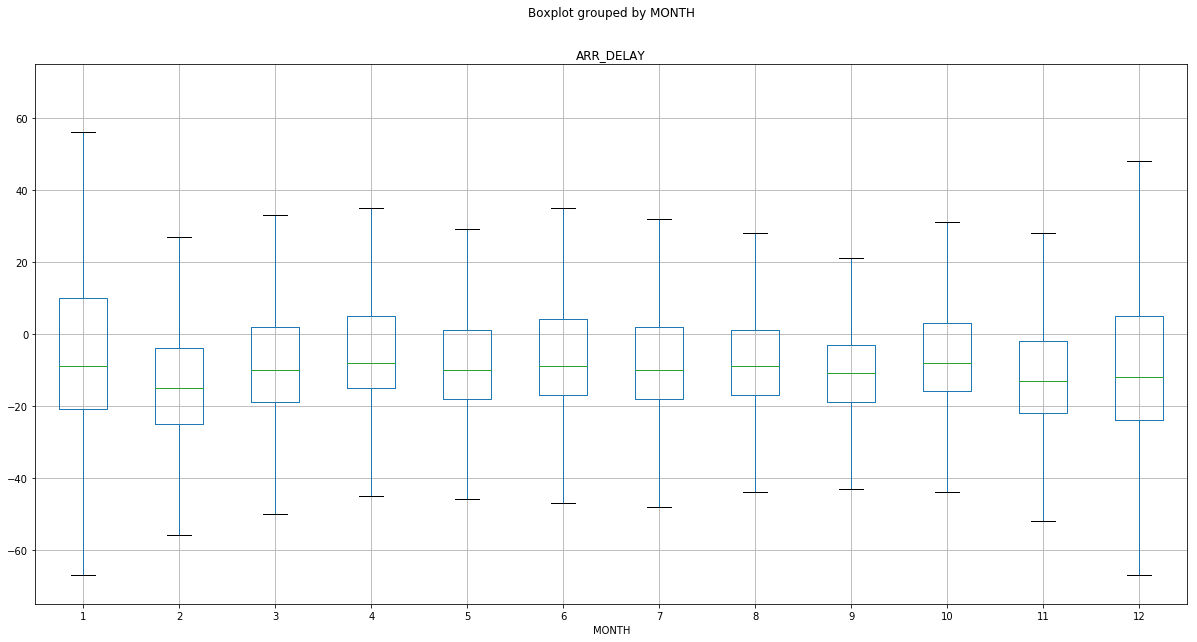

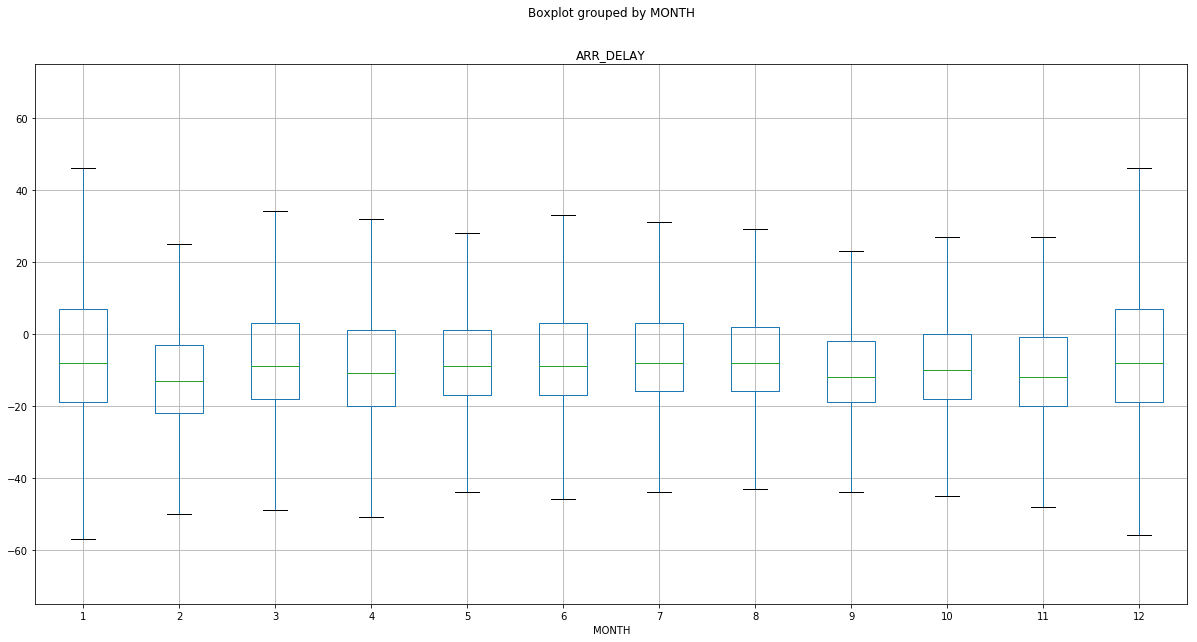

In [41]:
box=df_outbound.boxplot("ARR_DELAY",by="MONTH",figsize=(20,10), showfliers=False)
box.set_ylim(-75,75)
box=df_inbound.boxplot("ARR_DELAY",by="MONTH",figsize=(20,10), showfliers=False)
box.set_ylim(-75,75)

(-60, 60)

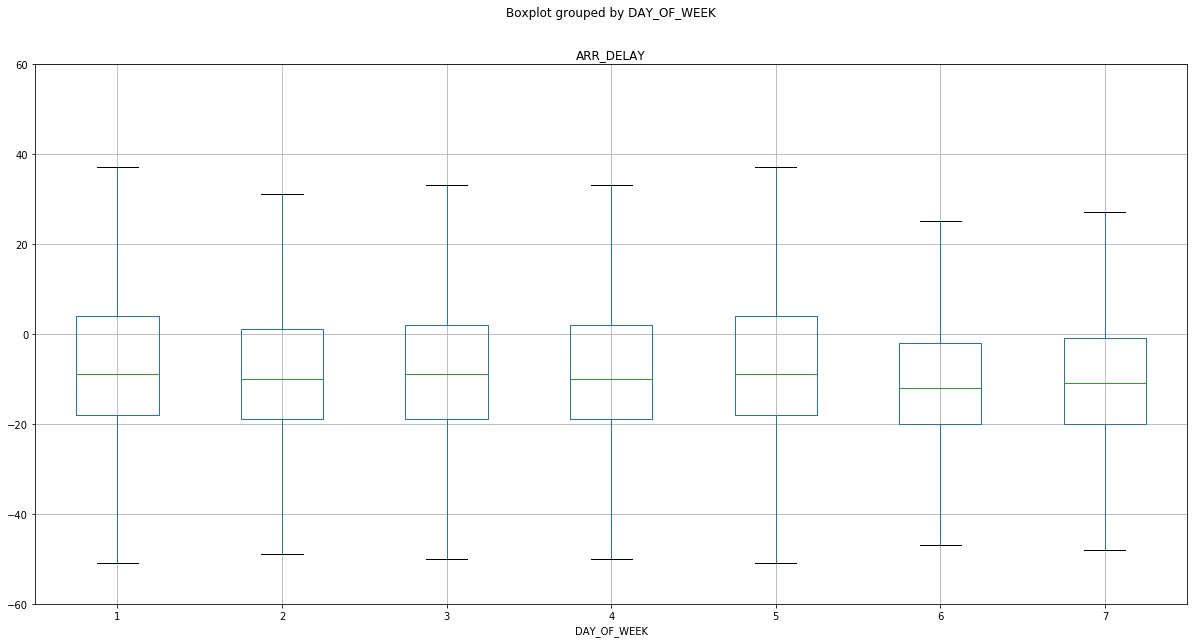

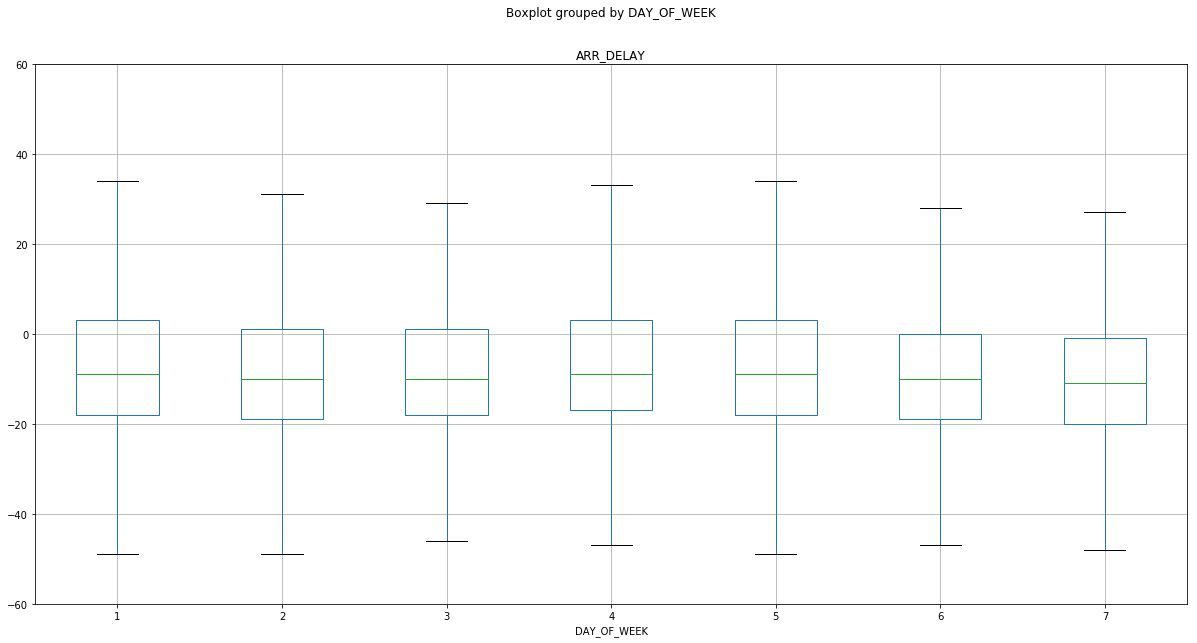

In [42]:
box=df_outbound.boxplot("ARR_DELAY",by="DAY_OF_WEEK",figsize=(20,10), showfliers=False)
#1=Monday
box.set_ylim(-60,60)
box=df_inbound.boxplot("ARR_DELAY",by="DAY_OF_WEEK",figsize=(20,10), showfliers=False)
box.set_ylim(-60,60)

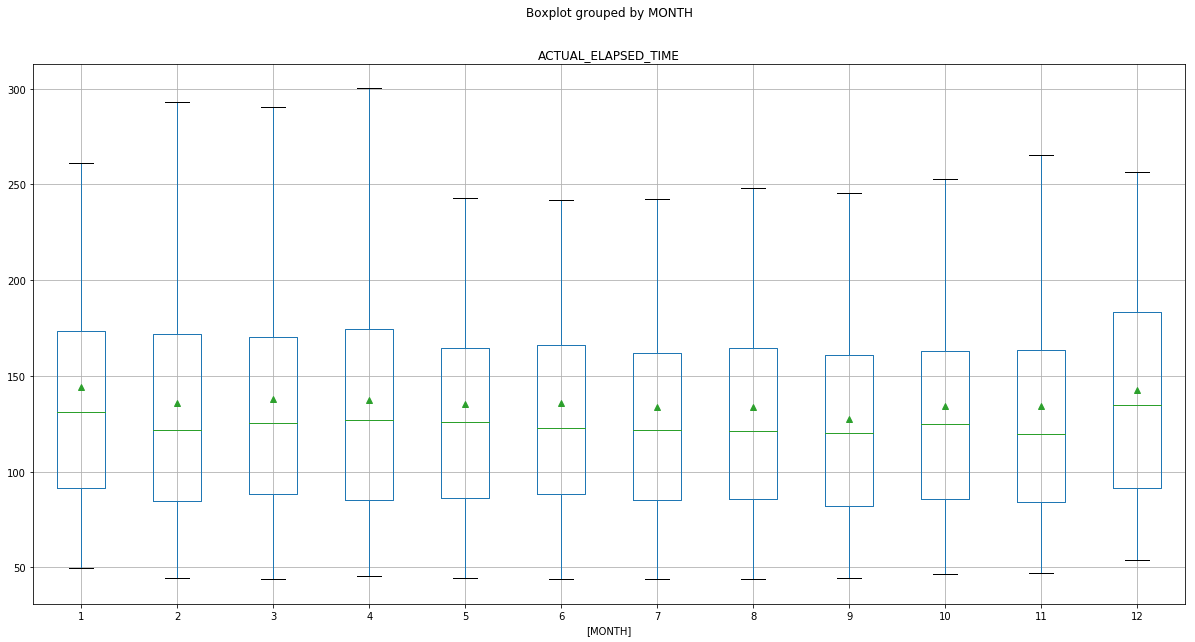

In [61]:
df_elapsed_month=df_outbound.groupby(["MONTH","DEST_AIRPORT"]).mean()
df_elapsed_month=df_elapsed_month.reset_index(drop=False)

box=df_elapsed_month.boxplot("ACTUAL_ELAPSED_TIME",by=["MONTH"],figsize=(20,10), showfliers=False, showmeans=True)

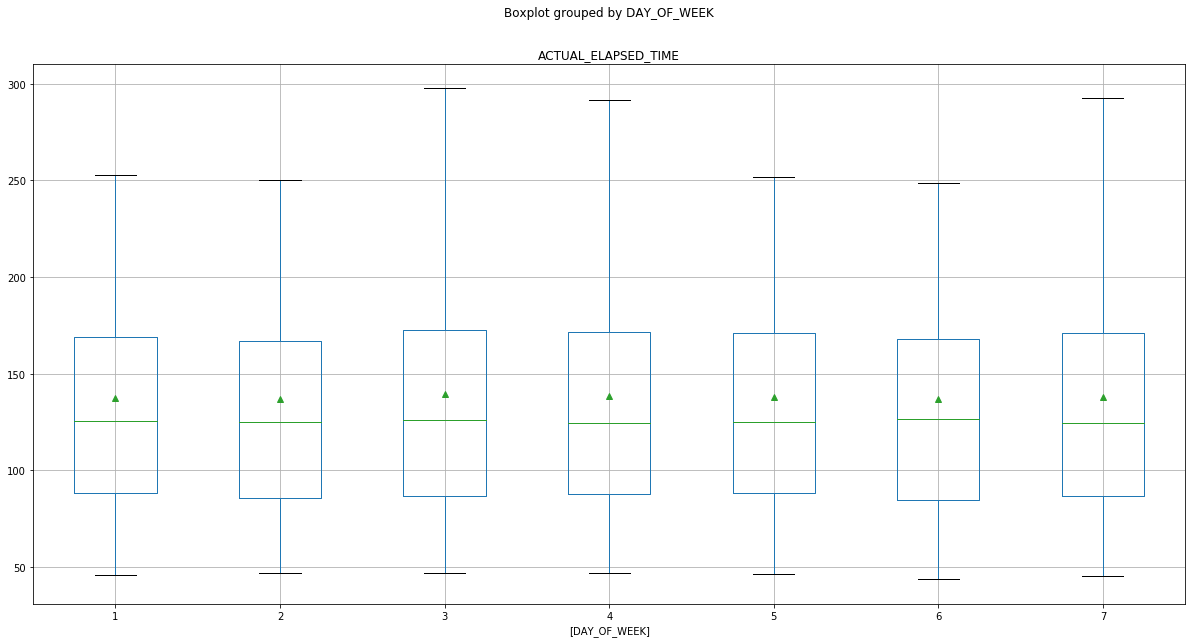

In [63]:
df_elapsed_day=df_outbound.groupby(["DAY_OF_WEEK","DEST_AIRPORT"]).mean()
df_elapsed_day=df_elapsed_day.reset_index(drop=False)

box=df_elapsed_day.boxplot("ACTUAL_ELAPSED_TIME",by=["DAY_OF_WEEK"],figsize=(20,10), showfliers=False, showmeans=True)